
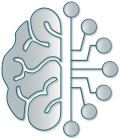

**Start at:** Friday 26 September 2025, 10:03:19  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# SandBox

## PDF to RDF

rdf between 0.0 Å and 50.0 Å. Step = 0.01 Å. Number of values = 5001
First intense peak found at: 2.85 Å. g(r) = 6.31


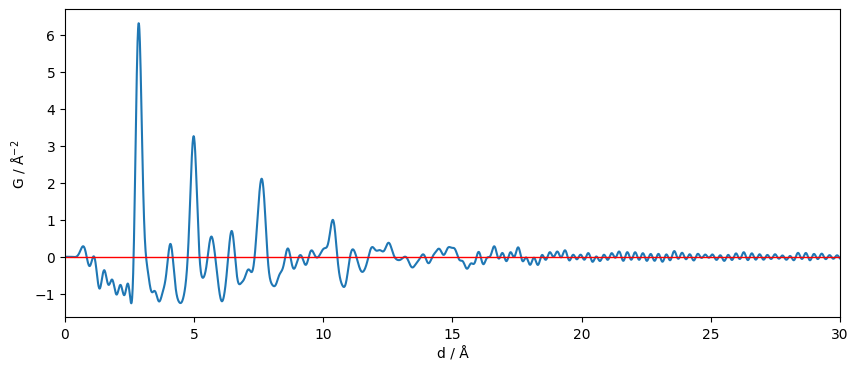

rdf between 0.0 Å and 30.0 Å. Step = 0.01 Å. Number of values = 3001
First intense peak found at: 2.85 Å. g(r) = 5.96


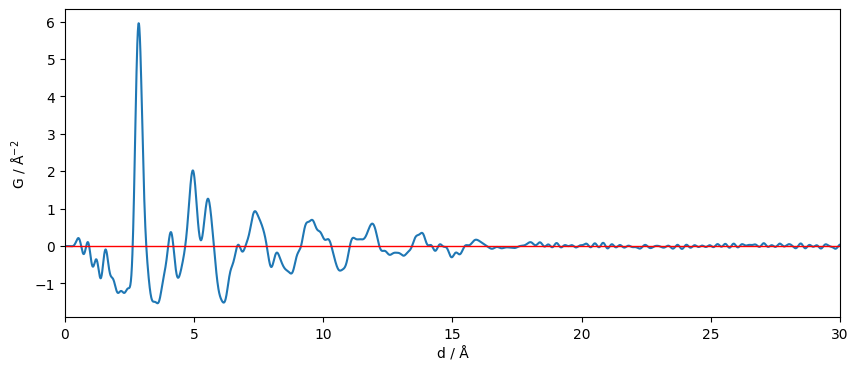

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.signal import find_peaks
pathway2rdfExp = "./ML-data/RDFs/expRDF/"

#########################################################################################################################################

t4pPC.centertxt("PDF of a pentagonal bipyramid AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
rDeca,grDeca = np.genfromtxt(pathway2rdfExp+"AuNP-CGSR_021_decahedron.csv", delimiter="\t", unpack=True, skip_header=1)
print(f"rdf between {rDeca[0]} Å and {rDeca[-1]} Å. Step = {rDeca[1]-rDeca[0]} Å. Number of values = {len(rDeca)}")
peaksDeca, _ = find_peaks(grDeca,height=1)
print(f"First intense peak found at: {rDeca[peaksDeca[0]]:.2f} Å. g(r) = {grDeca[peaksDeca[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rDeca,grDeca)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()

#########################################################################################################################################

t4pPC.centertxt("PDF of an icosahedral AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
rIco,grIco = np.genfromtxt(pathway2rdfExp+"AuNP-NS_Ti25C_1000_0001_0001_icosahedron.csv", delimiter="\t", unpack=True, skip_header=1)
print(f"rdf between {rIco[0]} Å and {rIco[-1]} Å. Step = {rIco[1]-rIco[0]} Å. Number of values = {len(rIco)}")
peaksIco, _ = find_peaks(grIco,height=1)
print(f"First intense peak found at: {rIco[peaksIco[0]]:.2f} Å. g(r) = {grIco[peaksIco[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rIco,grIco)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()

[0.000e+00 1.000e-02 2.000e-02 ... 4.998e+01 4.999e+01 5.000e+01]
-0.5407280958587143 0.2776963323538378


<Figure size 700x500 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'f(x)')

(0.0, 10.0)

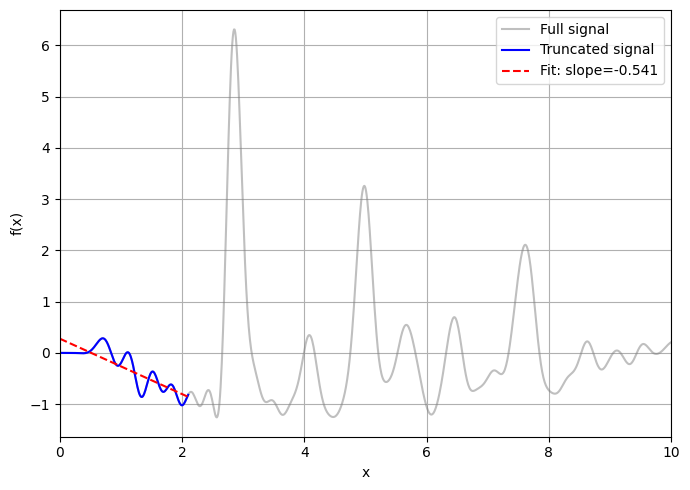

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
print(rDeca)
mask = rDeca <= 2.1
x_sub = rDeca[mask]
y_sub = grDeca[mask]

X_sub = x_sub.reshape(-1,1)
model = LinearRegression().fit(X_sub, y_sub)
av_slope = model.coef_[0]
intercept = model.intercept_

print(av_slope, intercept)

# --- Line predicted by regression ---
y_fit = model.predict(X_sub)

# --- Plot ---
plt.figure(figsize=(7,5))
plt.plot(rDeca, grDeca, "gray", alpha=0.5, label="Full signal")
plt.plot(x_sub, y_sub, "b", label="Truncated signal")
plt.plot(x_sub, y_fit, "r--", label=f"Fit: slope={av_slope:.3f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

$$G(r)=4\pi r\rho(r)-4\pi r\rho_{0}$$

$$RDF(r)=G(r)+4\pi r\rho_{0}$$

0.05900624460577753


rdf between 0.0 Å and 50.0 Å. Step = 0.01 Å. Number of values = 5001


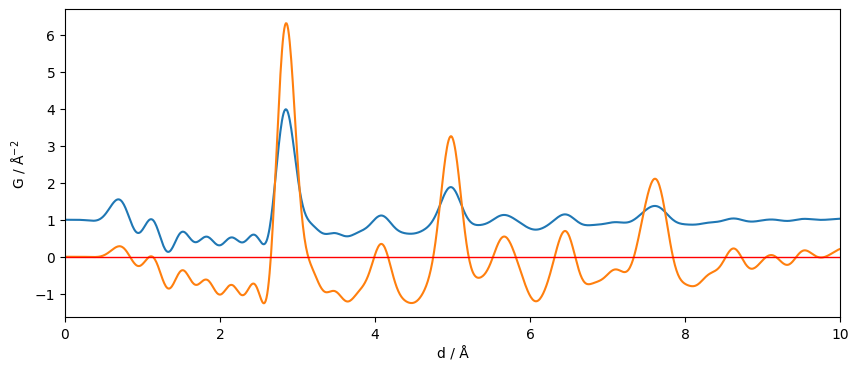

In [15]:
# RDFDeca = grDeca - 4 * np.pi * rDeca * av_slope
# === Gold atomic density rho0 (atoms / Å^3) ===
rho_mass = 19.3      # g/cm^3
M = 196.97           # g/mol
NA = 6.022e23        # mol^-1
rho0 = (rho_mass / M) * NA / 1e24  # atoms/Å^3
print(rho0)
eps=1e-8
RDFDeca = 1+ grDeca/(4*np.pi*(rDeca+eps)*rho0)
# RDFDeca = grDeca**2
# 
t4pPC.centertxt("RDF of a pentagonal bipyramid AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
print(f"rdf between {rDeca[0]} Å and {rDeca[-1]} Å. Step = {rDeca[1]-rDeca[0]} Å. Number of values = {len(rDeca)}")
# peaksDeca, _ = find_peaks(RDFDeca,height=1)
# print(f"First intense peak found at: {rDeca[peaksDeca[0]]:.2f} Å. g(r) = {RDFDeca[peaksDeca[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rDeca,RDFDeca)
_ = plt.plot(rDeca,grDeca)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,10)
_ = plt.show()

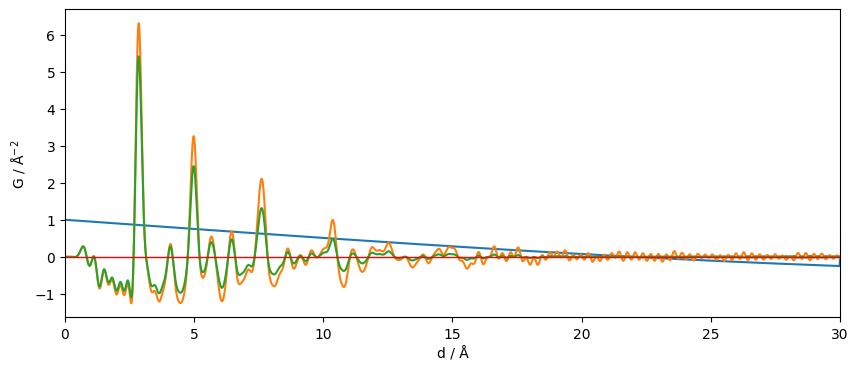

In [28]:
def spherical_envelope(r, R):
    f = np.zeros_like(r)
    mask = r < 2*R
    f[mask] = 1 - 3*r[mask]/(4*R) + 0.25*(r[mask]/(2*R))**3
    return f

R = 15.0  # e.g. nanoparticle radius in Å
envelope = spherical_envelope(rDeca, R)
g_finite = grDeca * envelope


_ = plt.figure(figsize=(10,4))
_ = plt.plot(rDeca,envelope)
_ = plt.plot(rDeca,grDeca)
_ = plt.plot(rDeca,g_finite)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()


<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

(0.0, 20.0)

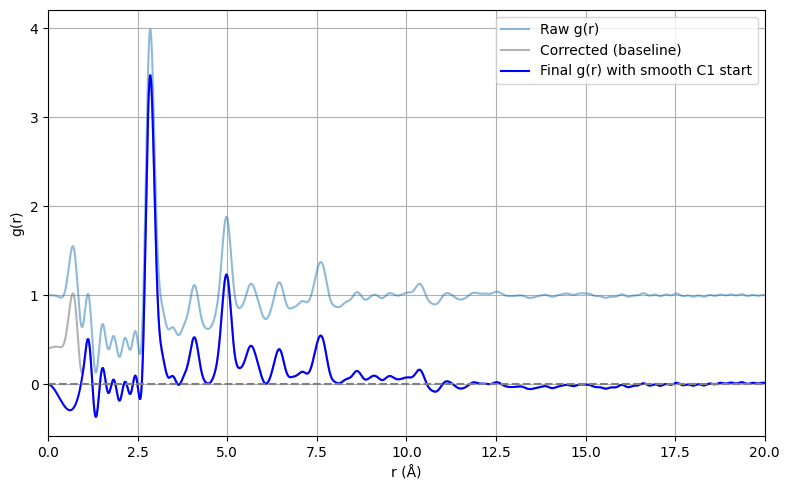

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

# --- Load file ---
df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron.csv", sep="\t")
df.columns = ["r", "G"]

# Gold parameters
rho_mass = 19.3
M = 196.97
NA = 6.022e23
rho0 = (rho_mass / M) * NA / 1e24

# g(r)
df["g"] = 1 + df["G"] / (4*np.pi*df["r"].replace(0, np.nan)*rho0)
r = df["r"].values
g = df["g"].values

# --- Baseline correction ---
minima_idx, _ = find_peaks(-g, distance=20)
r_min, g_min = r[minima_idx], g[minima_idx]
spline = UnivariateSpline(r_min, g_min, s=0.5)
f_r = spline(r)
g_corr = g - f_r

# --- Smooth replacement near r=0 with C1 continuity ---
r_cut = 1.0
mask_low = r <= r_cut
mask_high = r > r_cut

# Values and slope at r_cut
y_cut = g_corr[r >= r_cut][0]
dy_cut = np.gradient(g_corr, r)[r >= r_cut][0]

# Solve for cubic coefficients: p(r) = a r^3 + b r^2 + c r + d
# Conditions: p(0)=0, p'(0)=0, p(r_cut)=y_cut, p'(r_cut)=dy_cut
# => d=0, c=0
# => system for a,b:
#   a r_cut^3 + b r_cut^2 = y_cut
#   3 a r_cut^2 + 2 b r_cut = dy_cut
A = np.array([[r_cut**3, r_cut**2],
              [3*r_cut**2, 2*r_cut]])
B = np.array([y_cut, dy_cut])
a, b = np.linalg.solve(A, B)

def poly_smooth(r):
    return a*r**3 + b*r**2

# Replace low region
g_final = np.copy(g_corr)
g_final[mask_low] = poly_smooth(r[mask_low])

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.5)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Corrected (baseline)")
plt.plot(r, g_final, "b", label="Final g(r) with smooth C1 start")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.legend()
plt.xlim(0,20)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

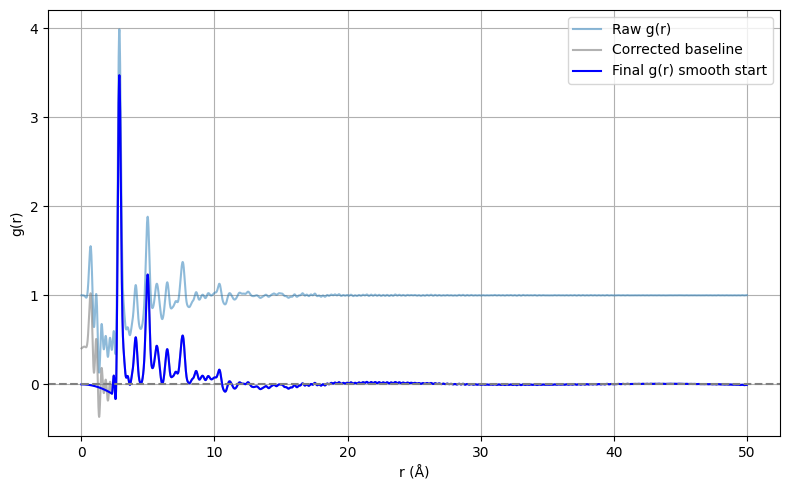

In [39]:
r_cut = 2.3
mask_low = r <= r_cut

# valeur cible à r_cut
y_cut = g_corr[r >= r_cut][0]

# Quadratic smooth
alpha = y_cut / (r_cut**2)
g_smooth = alpha * r[mask_low]**2

# Merge
g_final = np.copy(g_corr)
g_final[mask_low] = g_smooth

# Plot
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.5)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Corrected baseline")
plt.plot(r, g_final, "b", label="Final g(r) smooth start")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

(0.0, 20.0)

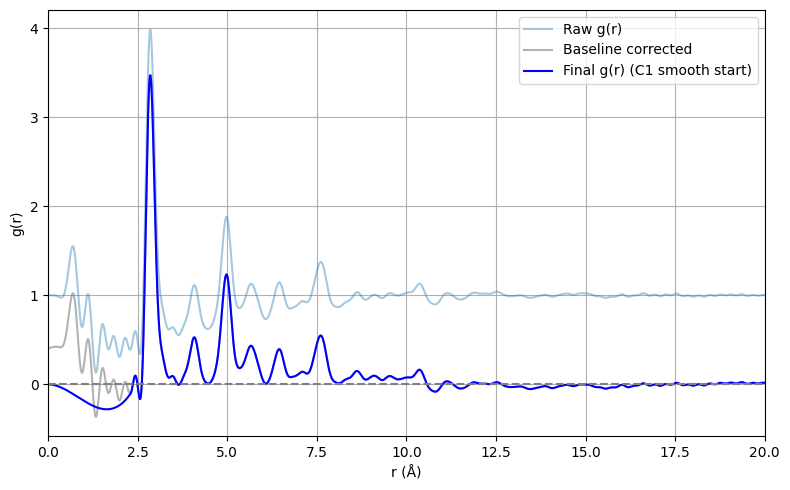

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

# --- Load file ---
df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron.csv", sep="\t")
df.columns = ["r", "G"]

# Densité atomique de l'or
rho_mass = 19.3
M = 196.97
NA = 6.022e23
rho0 = (rho_mass / M) * NA / 1e24

# g(r) à partir de G(r)
df["g"] = 1 + df["G"] / (4*np.pi*df["r"].replace(0, np.nan)*rho0)
r = df["r"].values
g = df["g"].values

# --- Correction baseline par spline sur minima ---
minima_idx, _ = find_peaks(-g, distance=20)
r_min, g_min = r[minima_idx], g[minima_idx]
spline = UnivariateSpline(r_min, g_min, s=0.5)
f_r = spline(r)
g_corr = g - f_r

# --- Remplacement du début par polynôme cubique raccordé ---
r_cut = 2.3
mask_low = r <= r_cut
mask_high = r > r_cut

# Valeur et pente en r_cut
y_cut = g_corr[r >= r_cut][0]
dy_cut = np.gradient(g_corr, r)[r >= r_cut][0]

# Résolution du système pour a et b
A = np.array([[r_cut**3, r_cut**2],
              [3*r_cut**2, 2*r_cut]])
B = np.array([y_cut, dy_cut])
a, b = np.linalg.solve(A, B)

def poly_smooth(rr):
    return a*rr**3 + b*rr**2

g_final = np.copy(g_corr)
g_final[mask_low] = poly_smooth(r[mask_low])

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.4)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Baseline corrected")
plt.plot(r, g_final, "b", label="Final g(r) (C1 smooth start)")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.legend()
plt.xlim(0,20)
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

(0.0, 20.0)

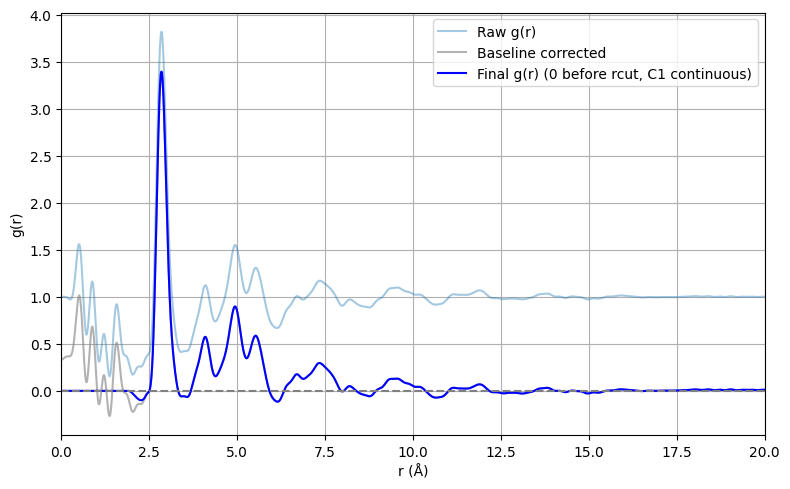

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

# --- Load file ---
# df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron.csv", sep="\t")
df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-NS_Ti25C_1000_0001_0001_icosahedron.csv", sep="\t")
df.columns = ["r", "G"]

# Densité atomique de l'or
rho_mass = 19.3
M = 196.97
NA = 6.022e23
rho0 = (rho_mass / M) * NA / 1e24

# g(r)
df["g"] = 1 + df["G"] / (4*np.pi*df["r"].replace(0, np.nan)*rho0)
r = df["r"].values
g = df["g"].values

# --- Correction baseline ---
minima_idx, _ = find_peaks(-g, distance=20)
r_min, g_min = r[minima_idx], g[minima_idx]
spline = UnivariateSpline(r_min, g_min, s=0.5)
f_r = spline(r)
g_corr = g - f_r

# --- Forcer g=0 avant r_cut avec continuité de dérivée ---
r_cut = 2.4
delta = 0.5   # zone de transition lissée (Å)

mask_left = r < (r_cut - delta)
mask_mid  = (r >= (r_cut - delta)) & (r <= r_cut)
mask_right = r > r_cut

# Valeurs et pente au point de raccord
y_cut = g_corr[r >= r_cut][0]
dy_cut = np.gradient(g_corr, r)[r >= r_cut][0]

# Conditions pour un polynôme cubique p(r) = a r^3 + b r^2 + c r + d
# On travaille en coordonnées locales u = r - (r_cut - delta)
# Avec u=0: p=0, p'=0 ; avec u=delta: p=y_cut, p'=dy_cut
u = r[mask_mid] - (r_cut - delta)

A = np.array([[delta**3, delta**2],
              [3*delta**2, 2*delta]])
B = np.array([y_cut, dy_cut])
a, b = np.linalg.solve(A, B)

def poly_transition(u):
    return a*u**3 + b*u**2

g_final = np.zeros_like(g_corr)
g_final[mask_left] = 0
g_final[mask_mid] = poly_transition(u)
g_final[mask_right] = g_corr[mask_right]

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.4)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Baseline corrected")
plt.plot(r, g_final, "b", label="Final g(r) (0 before rcut, C1 continuous)")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.xlim(0,20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
df_out = pd.DataFrame({"r(Å)": r, "g(r)": g_final})
df_out.to_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron_corrected.csv", sep="\t", index=False)


In [51]:
df_out = pd.DataFrame({"r(Å)": r, "g(r)": g_final})
df_out.to_csv("./ML-data/RDFs/expRDF/AuNP-NS_Ti25C_1000_0001_0001_icosahedron_corrected.csv", sep="\t", index=False)
